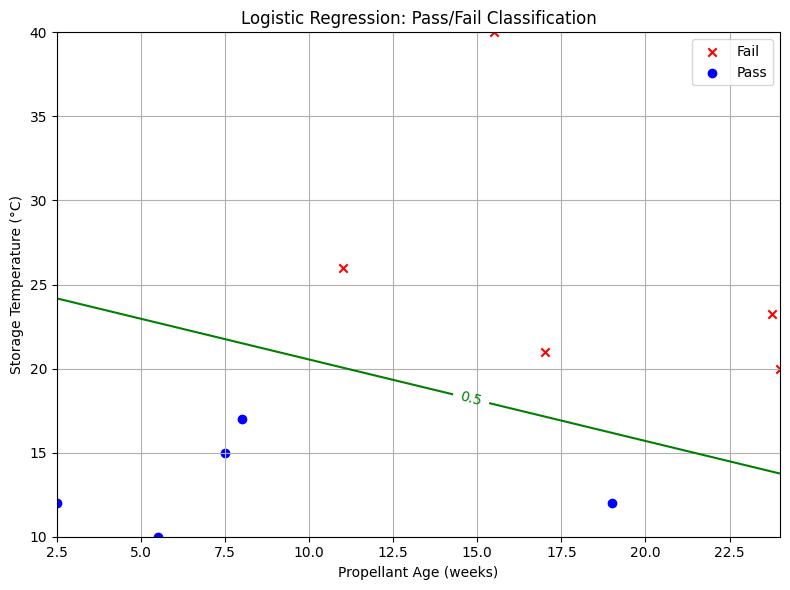

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset: [Age, Temperature, Label]
data = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

# Separate features and labels
X = data[:, :2]
y = data[:, 2]

# Add bias term (x0 = 1)
X_aug = np.hstack((np.ones((X.shape[0], 1)), X))

# Normalize age and temperature
X_mean = np.mean(X_aug[:, 1:], axis=0)
X_std = np.std(X_aug[:, 1:], axis=0)
X_aug[:, 1:] = (X_aug[:, 1:] - X_mean) / X_std

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    return -1/m * (y @ np.log(h + epsilon) + (1 - y) @ np.log(1 - h + epsilon))

# Gradient of the cost
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return 1/m * (X.T @ (h - y))

# Backtracking line search using Armijo condition
def backtracking_line_search(theta, grad, X, y, alpha=1.0, rho=0.5, c=1e-4):
    cost = compute_cost(theta, X, y)
    while compute_cost(theta - alpha * grad, X, y) > cost - c * alpha * np.dot(grad, grad):
        alpha *= rho
    return alpha

# Gradient descent with line search
def gradient_descent(X, y, theta_init, max_iters=10000, tol=1e-6):
    theta = theta_init.copy()
    for _ in range(max_iters):
        grad = compute_gradient(theta, X, y)
        alpha = backtracking_line_search(theta, grad, X, y)
        theta -= alpha * grad
        if np.linalg.norm(grad) < tol:
            break
    return theta

# Initialize theta
theta_init = np.zeros(X_aug.shape[1])

# Run optimization
theta_opt = gradient_descent(X_aug, y, theta_init)

# Create grid for contour plot
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
x2_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)

# Normalize grid features
xx1_norm = (xx1 - X_mean[0]) / X_std[0]
xx2_norm = (xx2 - X_mean[1]) / X_std[1]

# Prepare grid input with bias
X_grid = np.c_[np.ones(xx1.ravel().shape), xx1_norm.ravel(), xx2_norm.ravel()]
probs = sigmoid(X_grid @ theta_opt).reshape(xx1.shape)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter points
for label, marker, color in zip([0, 1], ['x', 'o'], ['red', 'blue']):
    subset = data[data[:, 2] == label]
    plt.scatter(subset[:, 0], subset[:, 1],
                c=color, label='Fail' if label == 0 else 'Pass', marker=marker)

# Contour for decision boundary (probability = 0.5)
cs = plt.contour(xx1, xx2, probs, levels=[0.5], colors='green')
plt.clabel(cs, inline=1, fontsize=10)

plt.title('Logistic Regression: Pass/Fail Classification')
plt.xlabel('Propellant Age (weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plot.png")  # Saves the plot as 'plot.png'
plt.show()
